## Trend Exhaustion

- Trend exhaustion indicates that a current trend is weakening and may reverse. It’s often identified through divergences in momentum indicators or volume analysis.

- When signs of exhaustion appear, like divergences in the RSI or declining volume on uptrends, traders should consider tightening stop-losses or taking profits, preparing for a potential trend reversal.

[*********************100%%**********************]  1 of 1 completed


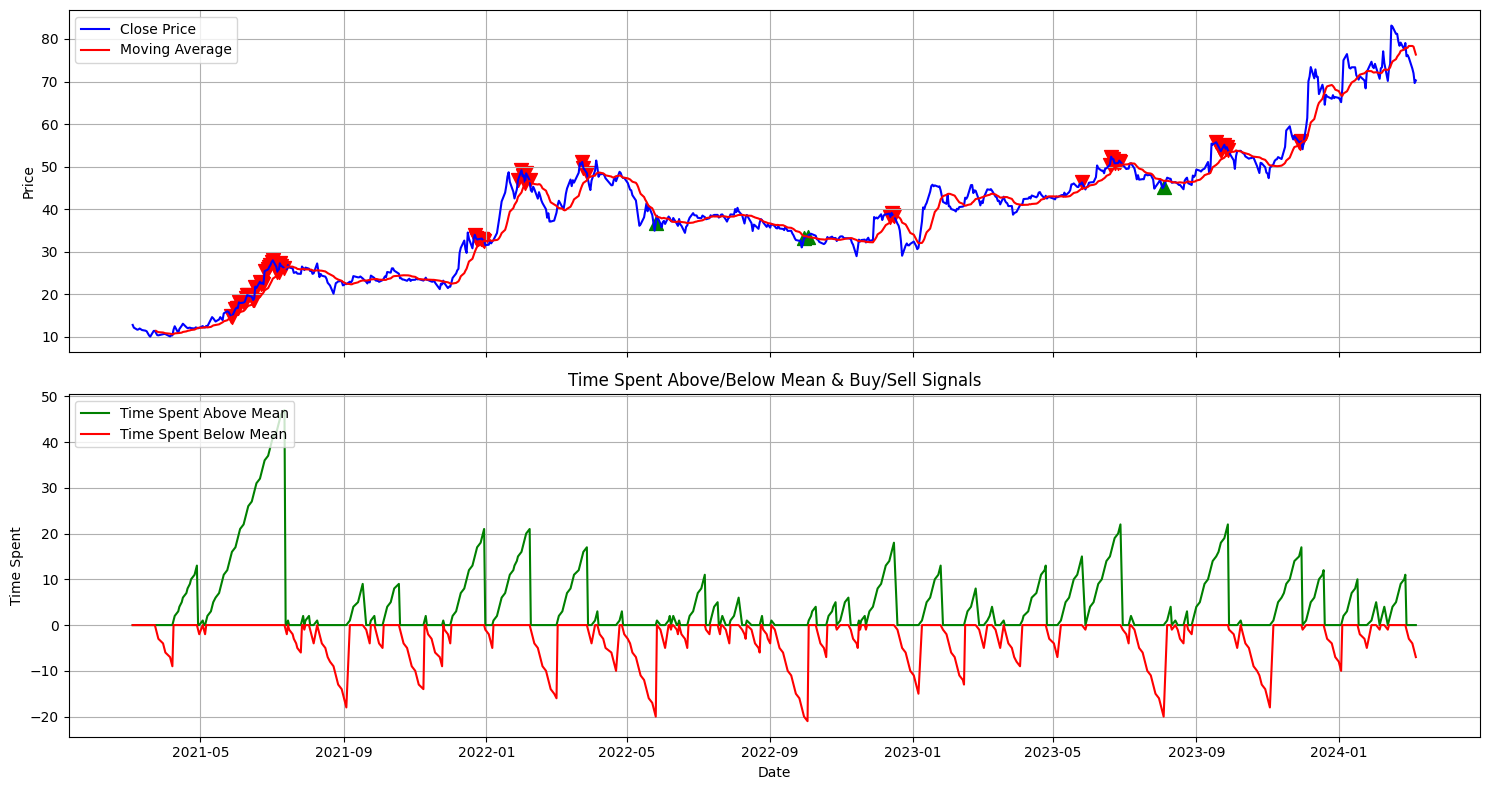

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def time_spent_above_below_mean(data, lookback, buy_threshold, sell_threshold):
    # Calculating the moving average
    ma = data['Close'].rolling(window=lookback).mean()

    # Time Spent Above the Mean
    above_mean = np.where(data['Close'] > ma, 1, 0)
    for i in range(1, len(above_mean)):
        if above_mean[i] == 1:
            above_mean[i] += above_mean[i-1]

    # Time Spent Below the Mean
    below_mean = np.where(data['Close'] < ma, -1, 0)
    for i in range(1, len(below_mean)):
        if below_mean[i] == -1:
            below_mean[i] += below_mean[i-1]

    # Generate signals
    signals = pd.Series(0, index=data.index)
    signals[below_mean <= sell_threshold] = 1  # Buy signal
    signals[above_mean >= buy_threshold] = -1  # Sell signal

    return pd.DataFrame({
        'Close': data['Close'],
        'ma': ma,
        'above_mean': pd.Series(above_mean, index=data.index),
        'below_mean': pd.Series(below_mean, index=data.index),
        'signals': signals
    })

def plot_data(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

    ax1.plot(df['Close'], label='Close Price', color='blue')
    ax1.plot(df['ma'], label='Moving Average', color='red')
    ax1.scatter(df.index, df['Close'].where(df['signals']==1), color='green', marker='^', alpha=1, s =100)
    ax1.scatter(df.index, df['Close'].where(df['signals']==-1), color='red', marker='v', alpha=1, s = 100)
    ax1.legend(loc='upper left')
    ax1.set_ylabel('Price')
    ax1.grid(True)

    ax2.plot(df['above_mean'], label='Time Spent Above Mean', color='green')
    ax2.plot(df['below_mean'], label='Time Spent Below Mean', color='red')
    ax2.legend(loc='upper left')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Time Spent')
    ax2.grid(True)

    plt.title('Time Spent Above/Below Mean & Buy/Sell Signals')
    plt.tight_layout()
    plt.show()

lookback_period = 14  # Define your lookback period here
buy_threshold = 15  # Define your sell threshold here (time spent above mean)
sell_threshold = -20  # Define your buy threshold here (time spent below mean)

# Ticker
ticker = "BCLIND.NS"

# Download historical data
data = yf.download(ticker, start='2020-01-01', end='2024-08-01')
data = data[['Close']]

df = time_spent_above_below_mean(data, lookback_period, buy_threshold, sell_threshold)
plot_data(df)